# Fake News Detection using Kaggle Dataset

In [165]:
import pandas as pd

In [166]:
cd "C:\Users\HP\ NPL\Fake news detection_LSTM"

C:\Users\HP\ NPL\Fake news detection_LSTM


In [167]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [168]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [169]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [172]:
#Handeling missing values
test=test.fillna(' ')
train=train.fillna(' ')

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [174]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5200 non-null   object
 2   author  5200 non-null   object
 3   text    5200 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [175]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [176]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [177]:
import tensorflow as tf

In [178]:
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [179]:
voc_size=10000

In [180]:
msg=train.copy()
test_msg=test.copy()

In [181]:
msg.reset_index(inplace=True)
test_msg.reset_index(inplace=True)

In [182]:
import nltk
import re
from nltk.corpus import stopwords

In [183]:
from IPython.display import clear_output
clear_output(wait=True)

## Porter Stemmer

In [184]:
# For Trainset data
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
all_text=[]
for i in range(0,len(msg)):
    clear_output()
    print(i)
    
    review=re.sub('[^a-zA-Z0-9]'," ",msg["title"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    all_text.append(review)
    
    
    

20799


In [185]:
# For Testset data
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
test_all_text=[]
for i in range(0,len(test_msg)):
    clear_output()
    print(i)
    
    review=re.sub('[^a-zA-Z0-9]'," ",test_msg["title"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    test_all_text.append(review)

5199


## WordNet Lemmatizer

In [186]:
#For Trainset
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
lem_all_text=[]
for i in range(0,len(msg)):
    clear_output()
    print(i)
    
    review=re.sub('[^a-zA-Z0-9]'," ",msg["title"][i])
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    lem_all_text.append(review)

20799


In [187]:
lem_all_text

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 '15 civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'life life luxury elton john 6 favorite shark picture stare long transcontinental flight',
 'beno hamon win french socialist party presidential nomination new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government trol

In [188]:
# For testset
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
lem_test_all_text=[]
for i in range(0,len(test_msg)):
    clear_output()
    print(i)
    
    review=re.sub('[^a-zA-Z0-9]'," ",test_msg["title"][i])
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    lem_test_all_text.append(review)

5199


In [189]:
print("size of train",len(all_text))
print("size of test",len(test_all_text))

size of train 20800
size of test 5200


In [190]:
#one hot representation for Porter Stemmer
from tensorflow.keras.preprocessing.text import one_hot
onehot=[one_hot(words,voc_size)for words in all_text]
print(onehot)
onehot_test=[one_hot(words,voc_size)for words in test_all_text]
print(onehot_test)

[[1387, 7122, 8339, 2572, 4743, 7163, 6422, 7107, 1955, 137], [4293, 6559, 7430, 8077, 6298, 7493, 8882], [2053, 1198, 3479, 8495], [9894, 6339, 114, 805, 9245, 4752, 8469], [5834, 6298, 9757, 9606, 8491, 8887, 6298, 3926, 8688, 5508], [7823, 7229, 7341, 3314, 1117, 2900, 2993, 1698, 6848, 6766, 3888, 8973, 4608, 698, 8882], [3505, 3505, 4691, 4689, 5963, 4724, 223, 7637, 2640, 4517, 4065, 2344, 194], [3661, 186, 8634, 8853, 9243, 9512, 1423, 336, 7684, 4760, 5711], [849, 9324, 9534, 1822, 2900, 5237, 593, 3995, 370, 7954, 7684, 4760, 5711], [2667, 8520, 8461, 7597, 4120, 2906, 2900, 7577, 7684, 4760, 5711], [277, 3590, 9294, 3946, 9317, 2310, 5185, 2855, 2900, 151], [2169, 8208, 806, 235, 8067, 3445, 8549, 7193], [3739, 7616, 5529, 9961, 9397, 7953, 2140, 6761, 5373, 2380, 7951], [9245, 1108, 4743, 2310, 2900, 4120], [996, 6509, 8637, 1949, 3620, 7430, 3500, 8603, 468], [7108, 5162, 2934, 3345, 8885, 2100, 6491, 7684, 4760, 5711], [2556, 9349, 527, 4398, 7389, 7684, 4760, 5711], [260,

In [191]:
# one Hot Vector for WordNet Lemmatizer
lem_onehot=[one_hot(words,voc_size)for words in lem_all_text]
print(lem_onehot)
lem_onehot_test=[one_hot(words,voc_size)for words in lem_test_all_text]
print(lem_onehot_test)

[[2873, 7122, 2752, 2572, 4743, 7163, 6422, 7107, 1955, 6960], [4293, 7913, 7430, 8077, 6298, 7686, 8882], [2053, 1198, 3479, 6855], [9894, 6339, 4345, 5769, 5776, 7956, 9877], [5834, 6298, 7519, 5034, 6472, 8074, 6298, 3253, 8688, 2043], [5262, 7229, 7341, 3314, 1117, 2900, 1622, 1698, 6848, 6766, 9001, 8973, 3354, 698, 8882], [3505, 3505, 4849, 4689, 5963, 4724, 7443, 7637, 719, 4517, 4065, 7001, 194], [3661, 186, 8634, 8853, 9243, 9808, 9312, 1297, 7684, 4760, 5711], [849, 9324, 9534, 1822, 2900, 5237, 593, 3995, 370, 7954, 7684, 4760, 5711], [2667, 8520, 8461, 1382, 4120, 2238, 2900, 9540, 7684, 4760, 5711], [277, 2416, 9294, 3946, 9053, 1311, 3939, 2855, 2900, 151], [2169, 711, 806, 235, 4571, 3445, 5730, 2535], [3739, 6208, 6947, 9961, 9397, 873, 2140, 2092, 5373, 2380, 7951], [5776, 3421, 4743, 2310, 2900, 4120], [86, 6509, 8233, 1949, 3620, 9987, 3500, 8603, 9370], [7108, 1430, 2934, 1247, 8885, 2100, 6491, 7684, 4760, 5711], [2556, 9349, 527, 8099, 7389, 7684, 4760, 5711], [36

## Word Embedding for Porter Stemmer

In [192]:
dim=20
embd=pad_sequences(onehot,padding="pre",maxlen=dim)
print(len(embd))
embd_test=pad_sequences(onehot_test,padding="pre",maxlen=dim)
print(len(embd_test))

20800
5200


In [193]:
import numpy as np
X=np.array(embd)
y=np.array(train["label"])

In [194]:
# for Poter Stemmer
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2)

## LSTM Model

In [195]:
emd_vec=50 #dimension
ps_model=Sequential()
ps_model.add(Embedding(voc_size,emd_vec,input_length=dim))
ps_model.add(LSTM(150))
ps_model.add(Dropout(0.2))
ps_model.add(Dense(1,activation="sigmoid"))
ps_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
ps_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 150)               120600    
_________________________________________________________________
dropout_11 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 151       
Total params: 620,751
Trainable params: 620,751
Non-trainable params: 0
_________________________________________________________________


In [197]:
history=ps_model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=10,batch_size=32)

Epoch 1/10
520/520 [==============================] - 17s 30ms/step - loss: 0.3539 - accuracy: 0.8247 - val_loss: 0.1699 - val_accuracy: 0.9310
Epoch 2/10
520/520 [==============================] - 23s 44ms/step - loss: 0.0984 - accuracy: 0.9640 - val_loss: 0.1828 - val_accuracy: 0.9310
Epoch 3/10
520/520 [==============================] - 20s 39ms/step - loss: 0.0493 - accuracy: 0.9826 - val_loss: 0.2222 - val_accuracy: 0.9293
Epoch 4/10
520/520 [==============================] - 20s 39ms/step - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.2835 - val_accuracy: 0.9248
Epoch 5/10
520/520 [==============================] - 20s 38ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.2935 - val_accuracy: 0.9180
Epoch 6/10
520/520 [==============================] - 21s 40ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.3340 - val_accuracy: 0.9226
Epoch 7/10
520/520 [==============================] - 20s 39ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.3813 - val_accuracy:

In [198]:
y_pred=ps_model.predict_classes(Xtest)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [199]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy : 92.25961538461539 %


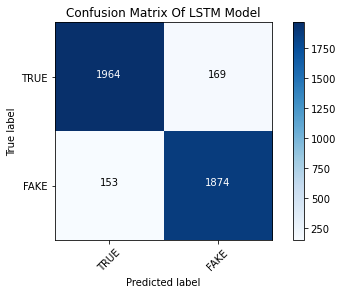

In [200]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(Ytest,y_pred)

print("Accuracy :",accuracy_score(Ytest,y_pred)*100,"%")
plot_confusion_matrix(cm,classes=['TRUE','FAKE'],title="Confusion Matrix Of LSTM Model")

## Prediction for kaggle Testset

In [201]:
embd_test

array([[   0,    0,    0, ..., 7684, 4760, 5711],
       [   0,    0,    0, ...,  821, 6375, 4305],
       [   0,    0,    0, ..., 8652, 8000, 9467],
       ...,
       [   0,    0,    0, ..., 7684, 4760, 5711],
       [   0,    0,    0, ..., 3739,  202, 5398],
       [   0,    0,    0, ..., 7684, 4760, 5711]])

In [202]:
pred=ps_model.predict_classes(embd_test)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [203]:
submission = pd.read_csv('submit.csv')
submission["label"] = pred
submission.to_csv('ps_submission.csv', index=False)
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,0
4,20804,1


## Word Embedding for Word Net Lemmatizer

In [204]:
dim=20
lem_embd=pad_sequences(lem_onehot,padding="pre",maxlen=dim)
print(len(lem_embd))
lem_embd_test=pad_sequences(lem_onehot_test,padding="pre",maxlen=dim)
print(len(lem_embd_test))

20800
5200


In [205]:
# for Word Net Lemmatizer
import numpy as np
X=np.array(lem_embd)
y=np.array(train["label"])

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2)

## LSTM Model

In [206]:
emd_vec=50 #dimension
lem_model=Sequential()
lem_model.add(Embedding(voc_size,emd_vec,input_length=dim))
lem_model.add(LSTM(150))
lem_model.add(Dropout(0.2))
lem_model.add(Dense(1,activation="sigmoid"))
lem_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
lem_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 50)            500000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 150)               120600    
_________________________________________________________________
dropout_12 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 151       
Total params: 620,751
Trainable params: 620,751
Non-trainable params: 0
_________________________________________________________________


In [207]:
history=lem_model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=10,batch_size=32)

Epoch 1/10
520/520 [==============================] - 26s 41ms/step - loss: 0.3546 - accuracy: 0.8344 - val_loss: 0.1653 - val_accuracy: 0.9325
Epoch 2/10
520/520 [==============================] - 21s 40ms/step - loss: 0.0994 - accuracy: 0.9621 - val_loss: 0.1654 - val_accuracy: 0.9368
Epoch 3/10
520/520 [==============================] - 21s 40ms/step - loss: 0.0556 - accuracy: 0.9812 - val_loss: 0.2237 - val_accuracy: 0.9334
Epoch 4/10
520/520 [==============================] - 21s 40ms/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.2407 - val_accuracy: 0.9209
Epoch 5/10
520/520 [==============================] - 21s 40ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.2849 - val_accuracy: 0.9279
Epoch 6/10
520/520 [==============================] - 21s 40ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.3722 - val_accuracy: 0.9325
Epoch 7/10
520/520 [==============================] - 20s 39ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.4931 - val_accuracy:

In [208]:
y_pred=lem_model.predict_classes(Xtest)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 92.90865384615384 %


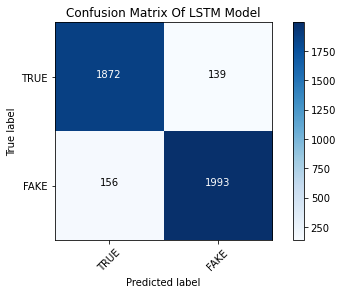

In [209]:
cm=confusion_matrix(Ytest,y_pred)

print("Accuracy :",accuracy_score(Ytest,y_pred)*100,"%")
plot_confusion_matrix(cm,classes=['TRUE','FAKE'],title="Confusion Matrix Of LSTM Model")

## Prediction for kaggle Testset

In [210]:
lem_embd_test

array([[   0,    0,    0, ..., 7684, 4760, 5711],
       [   0,    0,    0, ...,  821, 6375, 4305],
       [   0,    0,    0, ..., 8652, 8000, 1698],
       ...,
       [   0,    0,    0, ..., 7684, 4760, 5711],
       [   0,    0,    0, ..., 3739,  202, 5398],
       [   0,    0,    0, ..., 7684, 4760, 5711]])

In [211]:
pred=model.predict_classes(lem_embd_test)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [212]:
submission = pd.read_csv('submit.csv')
submission["label"] = pred
submission.to_csv('lem_submission.csv', index=False)
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,0
4,20804,1
